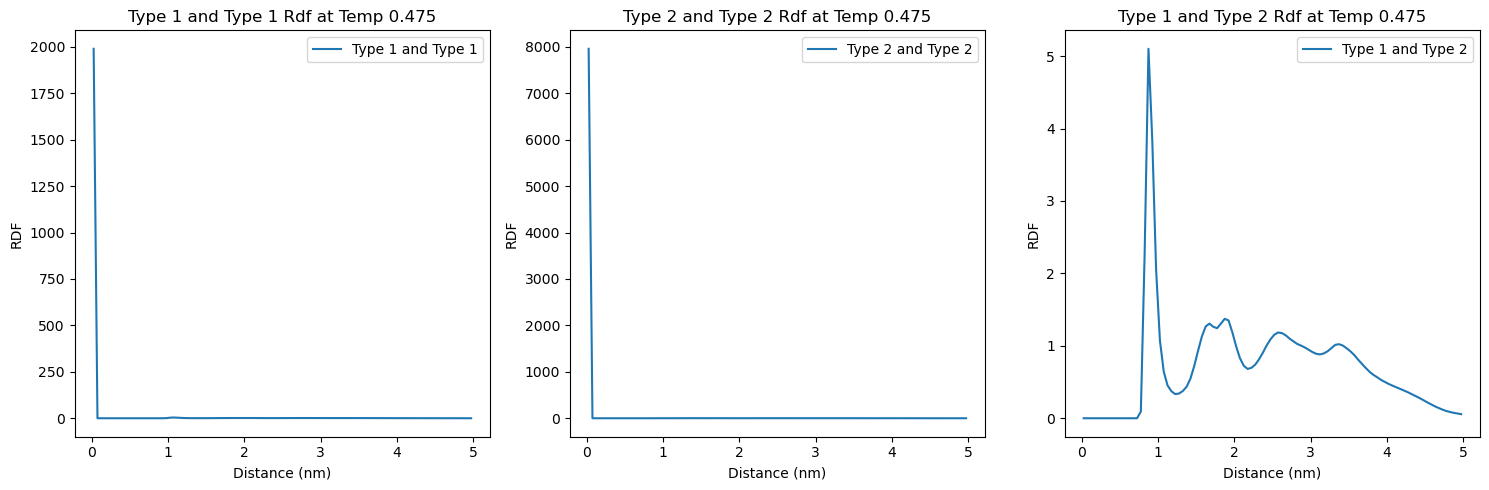

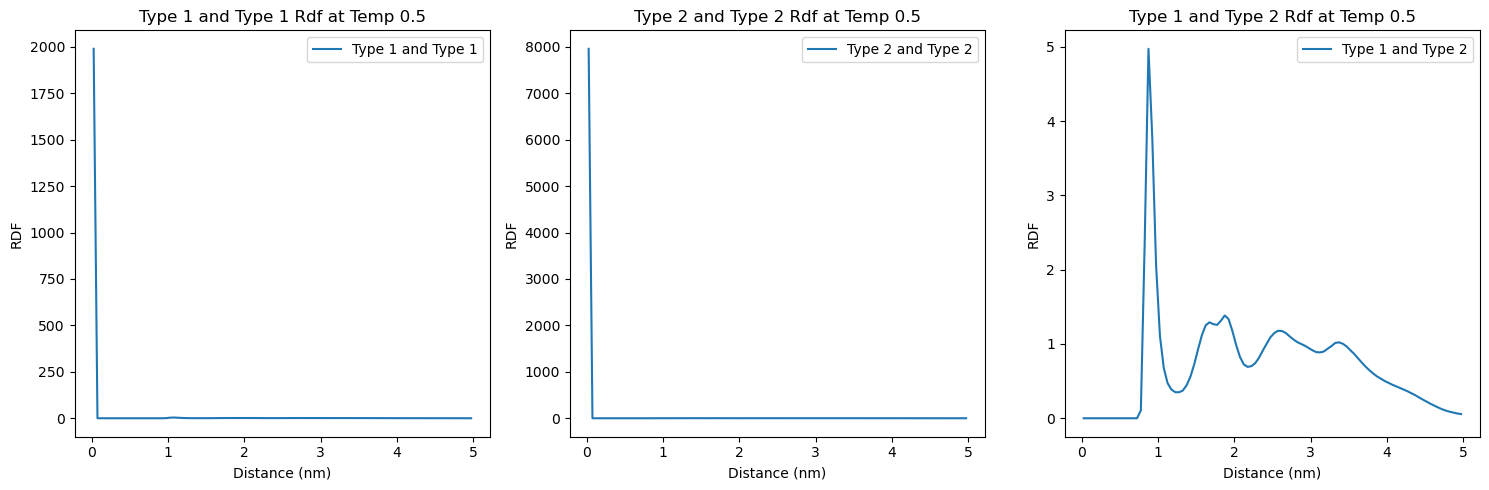

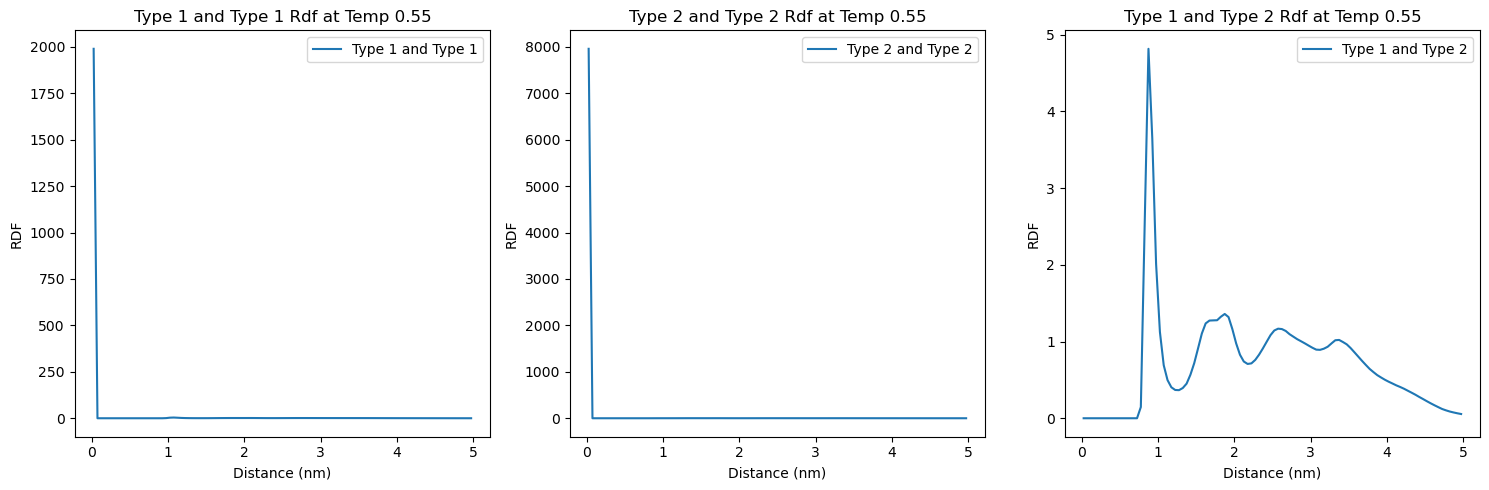

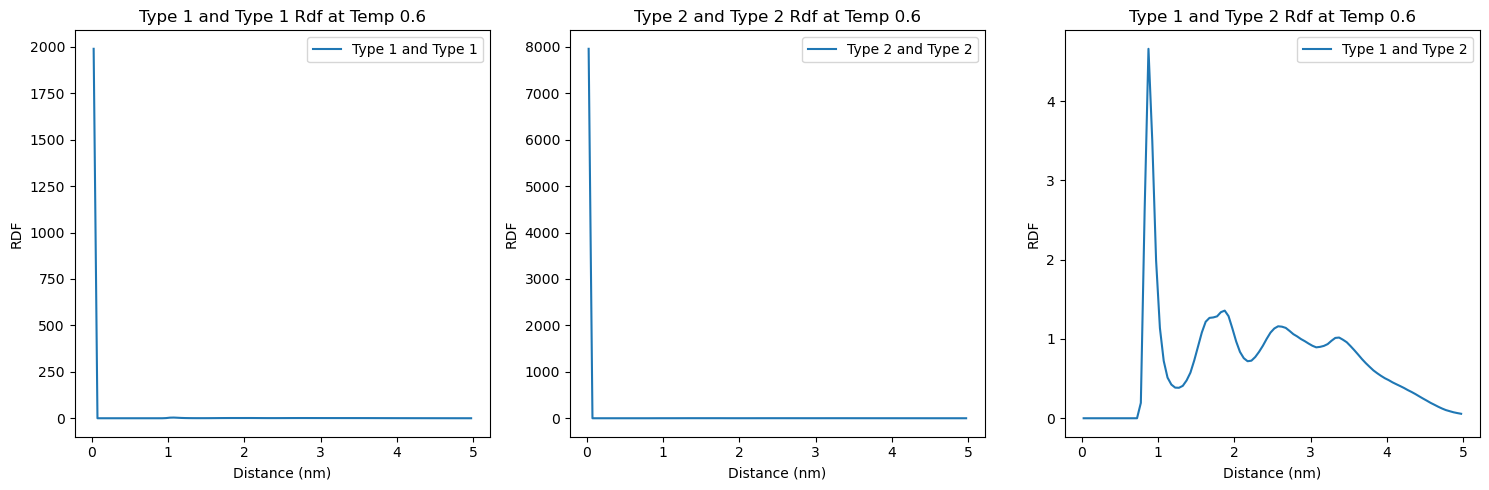

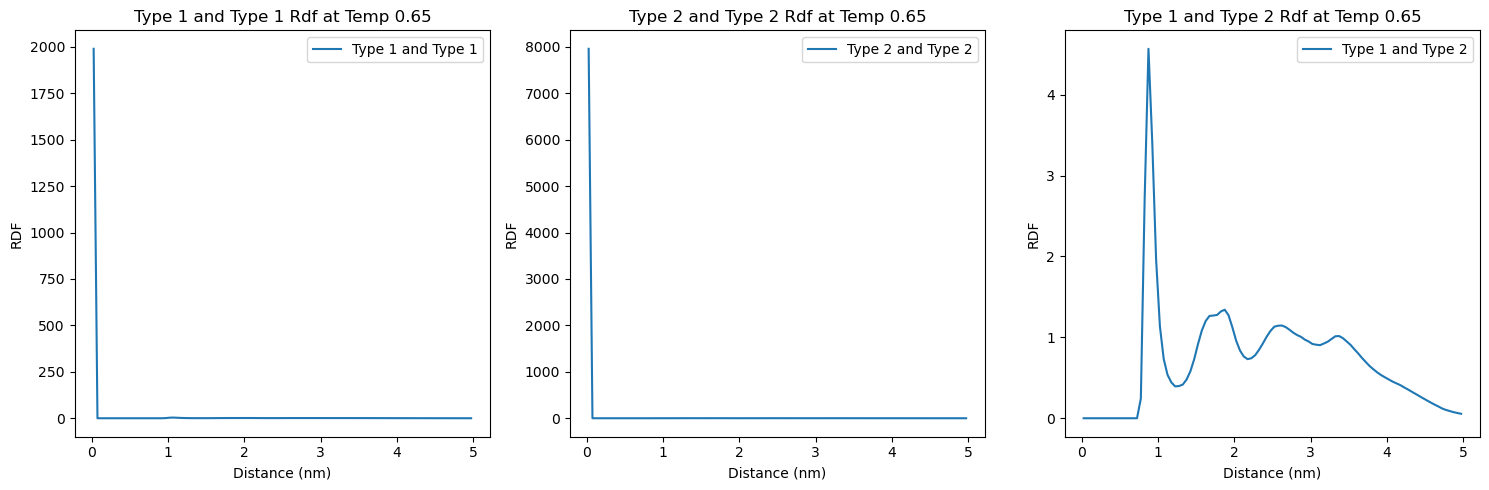

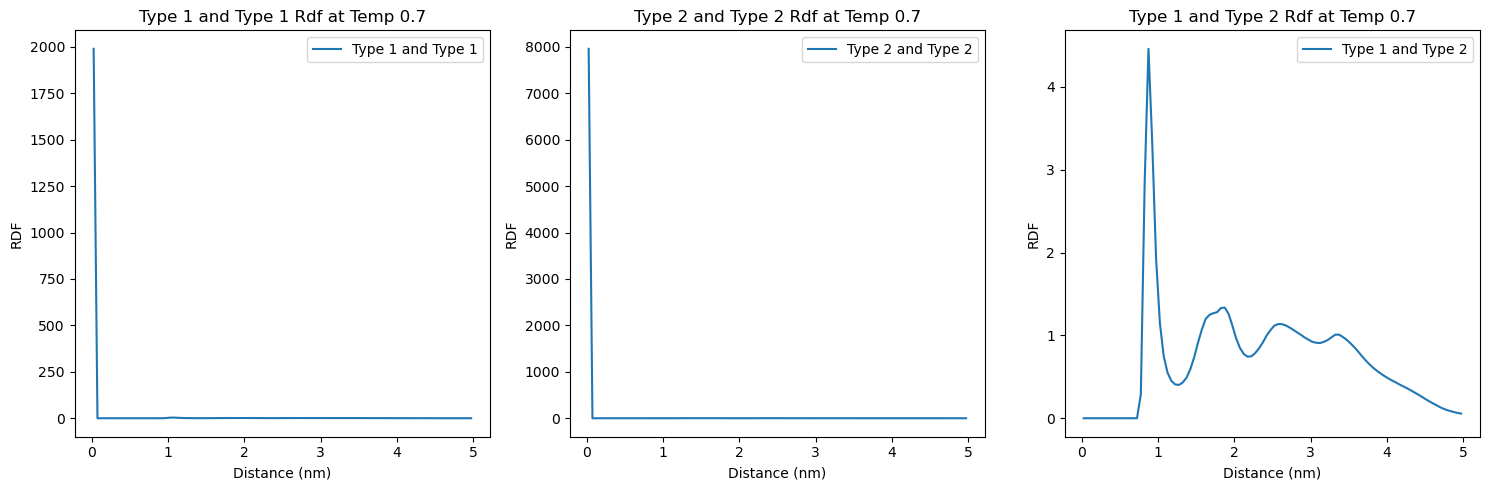

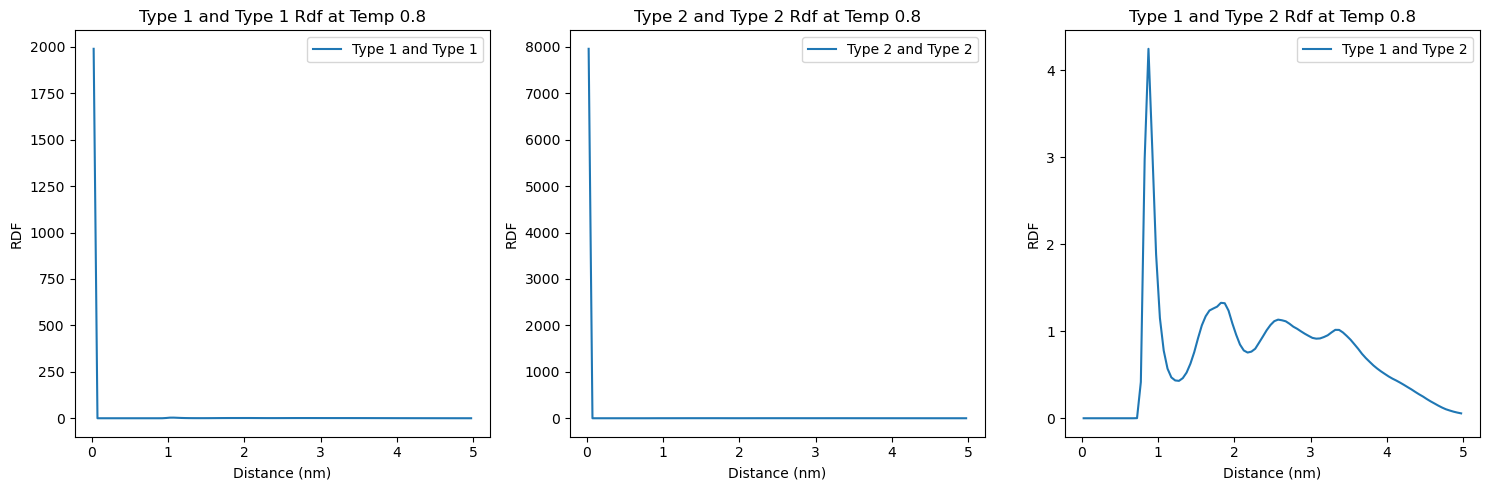

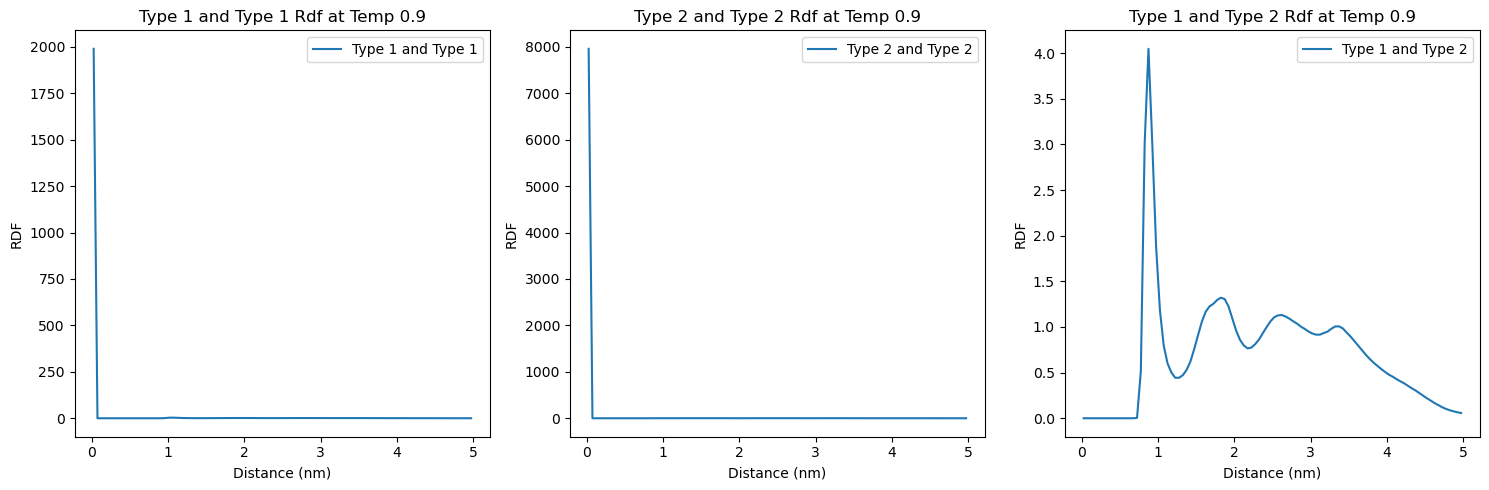

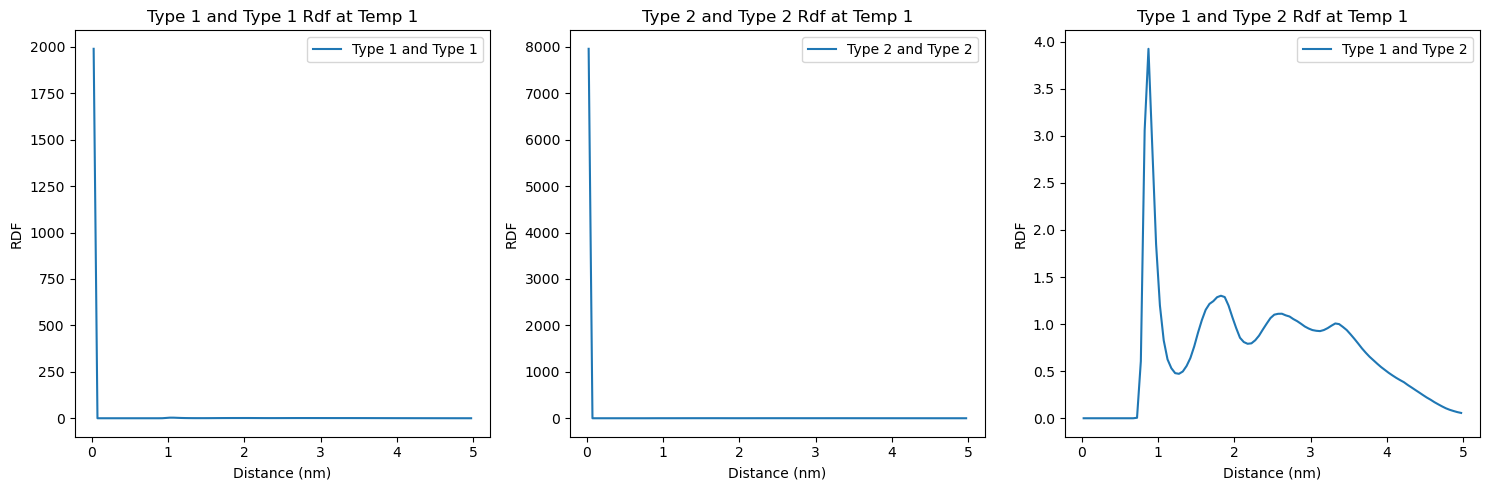

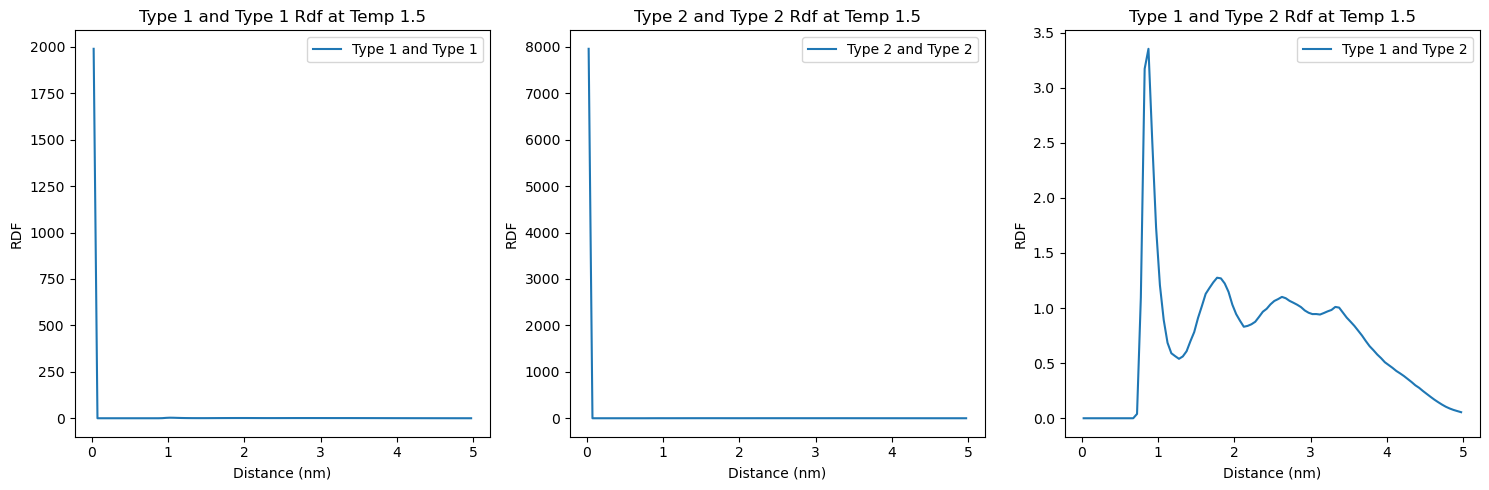

In [36]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rdf import InterRDF

temp = [0.475, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9, 1, 1.5]

# Define the array of numbers
trajectory_names = ['kalj_T0.475_n360_v300_30000000_1.lammpstrj', 'kalj_T0.5_n360_v300_10000000_1.lammpstrj', 'kalj_T0.55_n360_v300_3000000_1.lammpstrj', 'kalj_T0.6_n360_v300_1000000_1.lammpstrj', 'kalj_T0.65_n360_v300_350000_1.lammpstrj', 'kalj_T0.7_n360_v300_180000_1.lammpstrj', 'kalj_T0.8_n360_v300_150000_1.lammpstrj', 'kalj_T0.9_n360_v300_150000_1.lammpstrj', 'kalj_T1_n360_v300_50000_1.lammpstrj', 'kalj_T1.5_n360_v300_10000_1.lammpstrj']
topology_names = ['kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd', 'kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd', 'kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd', 'kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd', 'kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd', 'kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd', 'kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd', 'kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd', 'kalj_T1_n360_v300_prod_50000_1.unwrap.dcd', 'kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd']
iterations = 0

# Loop over file numbers
for i in range(10):
    # Construct file paths using the current value of i
    
    trajectory_path = f'../Data/equil/{trajectory_names[i]}'
    topology_path = f'../Data/prod/{topology_names[i]}'

    tlabel = temp[iterations]
    iterations += 1
    
    # Load your universe
    universe = mda.Universe(trajectory_path, topology_path, topology_format="LAMMPSDUMP")

    # Define selections
    selection_type_1 = universe.select_atoms('type 1')
    selection_type_2 = universe.select_atoms('type 2')

    # Compute RDF for type 1 and type 1
    rdf_1_1 = mda.analysis.rdf.InterRDF(selection_type_1, selection_type_1, nbins=100, range=(0, 5.0))
    rdf_1_1.run()

    # Compute RDF for type 2 and type 2
    rdf_2_2 = mda.analysis.rdf.InterRDF(selection_type_2, selection_type_2, nbins=100, range=(0, 5.0))
    rdf_2_2.run()

    # Compute RDF for type 1 and type 2
    rdf_1_2 = mda.analysis.rdf.InterRDF(selection_type_1, selection_type_2, nbins=100, range=(0, 5.0))
    rdf_1_2.run()
    
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    t1label = 'Type 1 and Type 1 Rdf at Temp ' + str(tlabel)
    t2label = 'Type 2 and Type 2 Rdf at Temp ' + str(tlabel)
    t3label = 'Type 1 and Type 2 Rdf at Temp ' + str(tlabel)
    
    axs[0].plot(rdf_1_1.results.bins, rdf_1_1.results.rdf, label='Type 1 and Type 1')
    axs[0].set_title(t1label)

    axs[1].plot(rdf_2_2.results.bins, rdf_2_2.results.rdf, label='Type 2 and Type 2')
    axs[1].set_title(t2label)

    axs[2].plot(rdf_1_2.results.bins, rdf_1_2.results.rdf, label='Type 1 and Type 2')
    axs[2].set_title(t3label)

    for ax in axs:
        ax.set_xlabel('Distance (nm)')
        ax.set_ylabel('RDF')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
